In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.isna()

,Category,Resume
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
957,False,False
958,False,False
959,False,False
960,False,False


In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [8]:
print ("Categories Of Resume:\n\n ")
print (df['Category'].unique())

Categories Of Resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [9]:
print ("Distinct Categories Of Resume And The Number Of Records Belonging To Each Category:\n\n")
print (df['Category'].value_counts())


Distinct Categories Of Resume And The Number Of Records Belonging To Each Category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


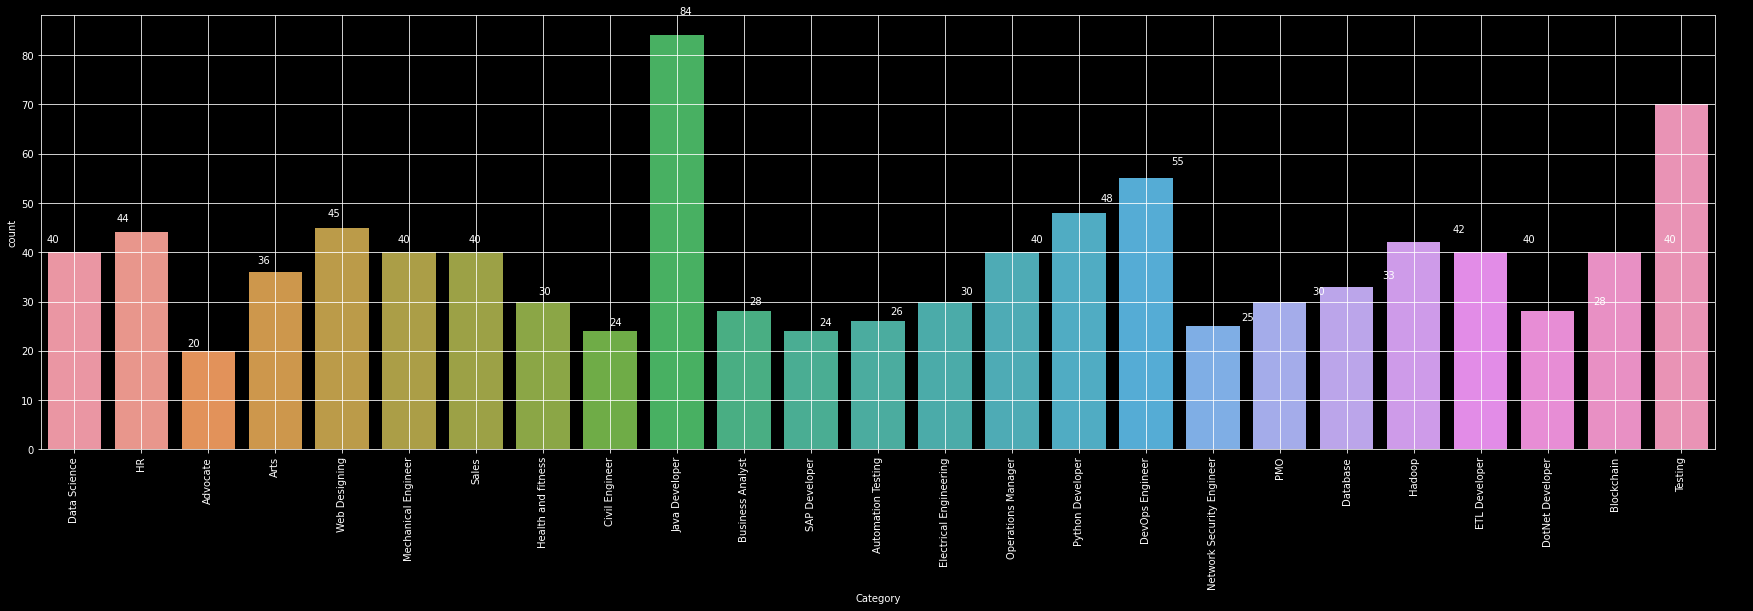

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.05 , i.get_height() * 1.05))
plt.grid()

In [11]:
from matplotlib.gridspec import GridSpec
counts=df['Category'].value_counts()
labels=df['Category'].unique()

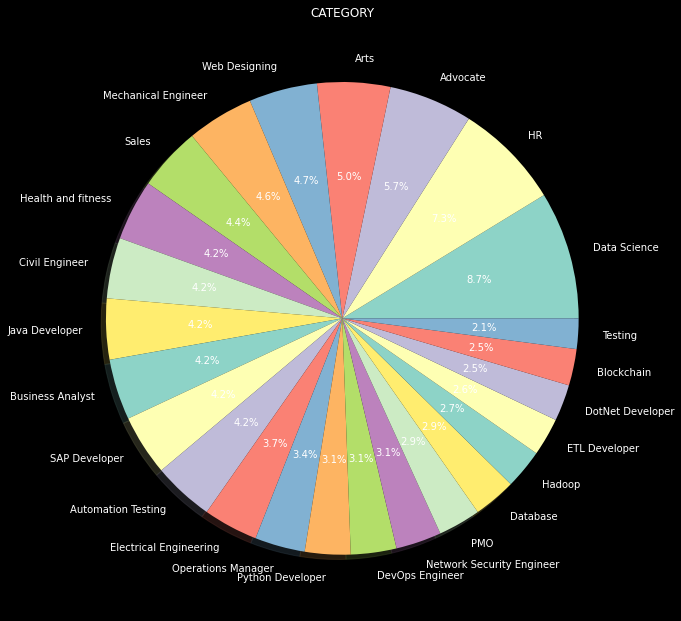

In [12]:
plt.figure(1,figsize=(50,50))
grid=GridSpec(4,4)
colour=plt.get_cmap('autumn')
plt.subplot(grid[0, 1], aspect=1, title='CATEGORY')

source_pie = plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

In [13]:
import re
def New_Resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text) 
    Text = re.sub('RT|cc', ' ', Text)  
    Text = re.sub('#\S+', '', Text)  
    Text = re.sub('@\S+', '  ', Text)  
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  
    Text = re.sub(r'[^\x00-\x7f]',r' ', Text) 
    Text = re.sub('\s+', ' ', Text)  
    return Text
    
df['New_Resume'] = df.Resume.apply(lambda x: New_Resume(x))

In [14]:
df.head()

,Category,Resume,New_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [15]:
df2=df.copy()

In [17]:
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [30]:
StopWords = set(stopwords.words('english')+['``',"''"])
Total_Words =[]
Sentences = df['Resume'].values
CleanedSentences = ""
for records in Sentences:
    CleanedText = New_Resume(records)
    CleanedSentences += CleanedText
    RequiredWords = nltk.word_tokenize(CleanedText)
    for word in RequiredWords:
        if word not in StopWords and word not in string.punctuation:
            Total_Words.append(word)
    
wordfreqdist = nltk.FreqDist(Total_Words)
Most_common = wordfreqdist.most_common(50)
print('Most Common Words=\n',Most_common)

Most Common Words=
 [('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [31]:
from sklearn.preprocessing import LabelEncoder

In [34]:
categories=['Category']
le=LabelEncoder()
for i in categories:
    df[i]=le.fit_transform(df[i])

In [36]:
df.head(20)

,Category,Resume,New_Resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visualization R Stu...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp techn...
9,6,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis Decis...


In [37]:
df.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [38]:
df2.Category.value_counts() 

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [39]:
del df2

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [42]:
Text=df['New_Resume'].values
Target=df['Category'].values

In [46]:
vectorizer=TfidfVectorizer(sublinear_tf=True,stop_words='english')
vectorizer.fit(Text)
Features=vectorizer.transform(Text)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(Features,Target,random_state=50,test_size=0.4,shuffle=True,stratify=Target)

In [49]:
print("-----------------------Feature Selection Completed-----------------------\n")
print(X_train.shape)
print(X_test.shape)

-----------------------Feature Selection Completed-----------------------

(577, 7351)
(385, 7351)


In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [53]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.95


In [55]:
print("\n Classification Report %s:\n%s\n" % (clf, metrics.classification_report(Y_test, prediction)))


 Classification Report OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      0.71      0.83        14
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        10
           6       0.88      0.88      0.88        16
           7       1.00      0.85      0.92        13
           8       1.00      0.95      0.98        22
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        16
          11       0.92      1.00      0.96        12
          12       0.88      0.78      0.82        18
          13       1.00      1.00      1.00        17
          14       1.00      0.75      0.86        12
          15       1.00      1.00      1.00        34
  